<a target="_blank" href="https://colab.research.google.com/github/trainocate-japan/Machine-Learning-and-Deep-Learning-Hands-on/blob/main/answer/4_決定木_ランダムフォレスト/4-1_決定木_ダイジェスト.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# データの準備
totsuka_kodate = pd.read_csv("totsuka_kodate.csv")
x = pd.get_dummies( totsuka_kodate[['築年数','最寄駅距離（分）','延床面積（㎡）','面積（㎡）','前面道路幅員（ｍ）','地区名', '前面道路種類', '土地の形状']])
y = totsuka_kodate['取引価格']
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=8)
# モデルの定義
model = DecisionTreeRegressor(max_depth = 5, random_state=0)
# 学習
model.fit(train_x,train_y)
# 評価
print(f'訓練データ精度：{model.score(train_x, train_y)}')
print(f'検証データ精度：{model.score(val_x, val_y)}')

訓練データ精度：0.7826347101224937
検証データ精度：0.43306520422564987


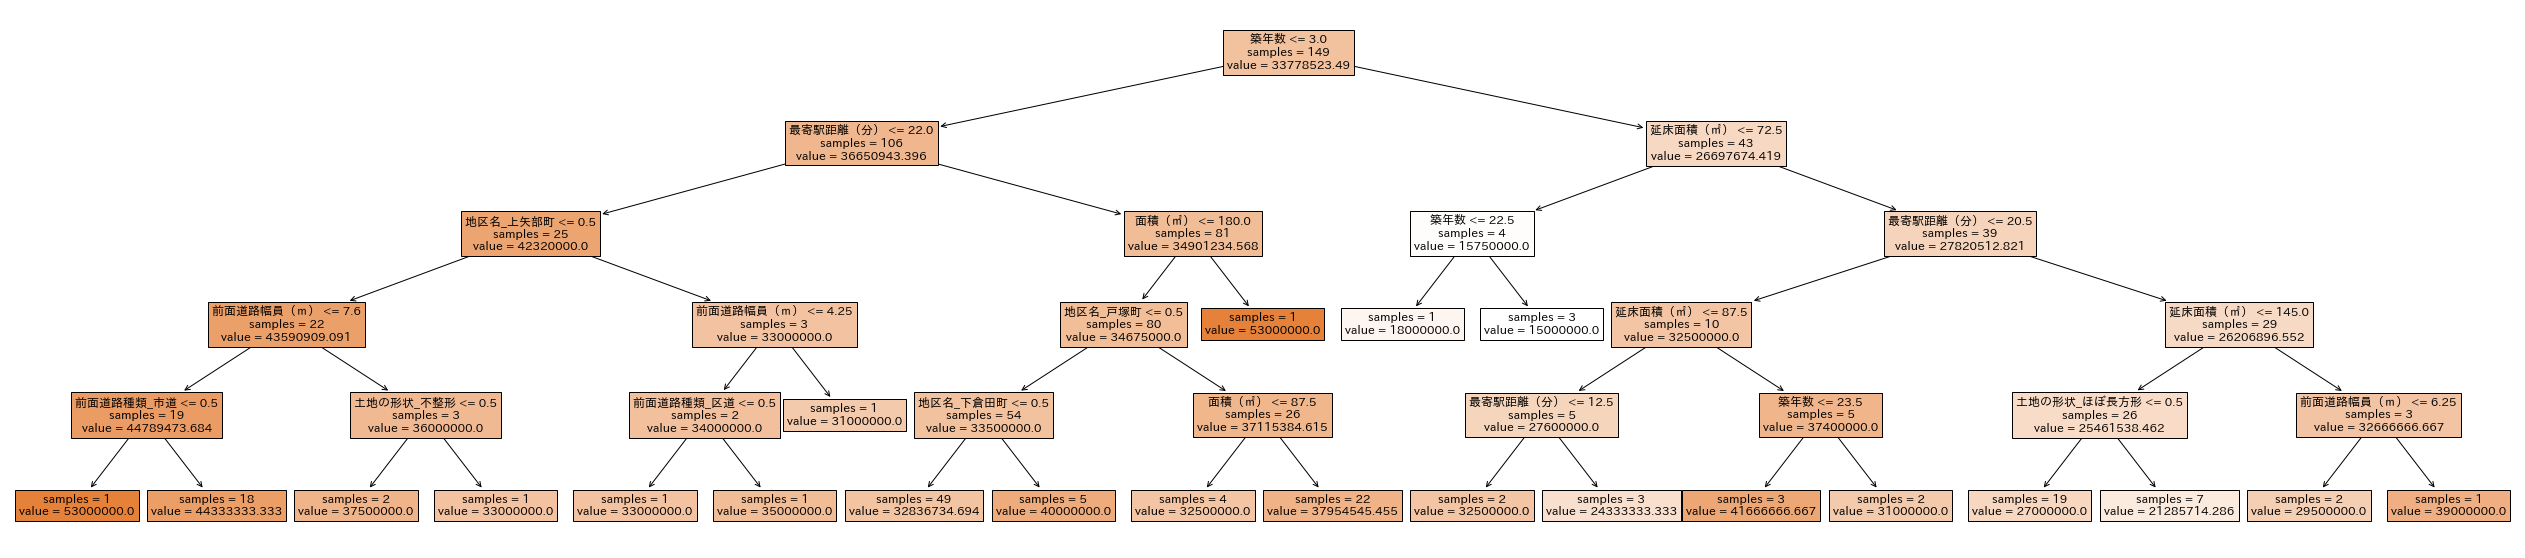

特徴量重要度：


,0
築年数,0.439661
最寄駅距離（分）,0.197534
延床面積（㎡）,0.125825
面積（㎡）,0.059894
地区名_上矢部町,0.041021
前面道路幅員（ｍ）,0.036894
地区名_下倉田町,0.032250
地区名_戸塚町,0.031778
土地の形状_ほぼ長方形,0.023139
前面道路種類_市道,0.009857


In [2]:
# 決定木の可視化
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
!pip install japanize_matplotlib | tail -n 1    # 日本語を表示させるために必要な設定
import japanize_matplotlib                      # 日本語を表示させるために必要な設定

plt.figure(figsize=(45,10))           # matplotlibで画像サイズの調整（横幅、縦幅）
plot_tree(
    model,                            # 可視化するモデルを指定
    max_depth=6,                      # 可視化する木の深さ
    feature_names = train_x.columns,  # 分割するときの説明変数名を設定
    filled=True,                      # 色を付ける場合はTrue
    fontsize=12,
    impurity=False                    # ジニ不純度(どれくらい分類できていないかどうか)を表示するかどうか
    )
plt.show()  # 結果を表示する

# 特徴量重要度確認
print("特徴量重要度：")
importances= model.feature_importances_
df_importances =pd.DataFrame(data=importances, index=train_x.columns)
display(df_importances.sort_values(0, ascending=False))